In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
# Function to read data from local .txt files
def read_txt_files(file_paths):
    data = ""
    
    # Combine data from all provided file paths
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                data += file.read()
                data += "\n"  # Separate data from different files
        except FileNotFoundError:
            print(f"Error: File '{file_path}' not found.")
        except Exception as e:
            print(f"Error reading file '{file_path}': {e}")
    
    # Parse the combined data
    data_list = data.strip().split("\n")
    data_json = {
        "target": [],
        "question": []
    }
    for d in data_list:
        try:
            if len(d) > 0:
                index = d.index(':')  # Find the position of the colon
                label, question = d[:index], d[index + 1:]
                data_json["target"].append(label.strip())
                data_json["question"].append(question.strip())
        except Exception as e:
            print(f"Error processing line: {d}, Error: {e}")
    
    return data_json

# List of .txt file paths
file_paths = [
    "C:/Users/ghada/DL/data/train_1000.txt",
    "C:/Users/ghada/DL/data/train_2000.txt",
    "C:/Users/ghada/DL/data/train_3000.txt",
    "C:/Users/ghada/DL/data/train_4000.txt",
    "C:/Users/ghada/DL/data/train_5500.txt"
]

# Load and process the data
data_json = read_txt_files(file_paths)
train_data = pd.DataFrame(data_json)


In [5]:
# Load and process the data
data_json = read_txt_files(file_paths)
train_data = pd.DataFrame(data_json)

In [6]:

# Save the DataFrame to a CSV file
csv_filename = C:\Users\ghada\DL\data\train_data_from_txt.csv"
train_data.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to train_data_from_txt.csv


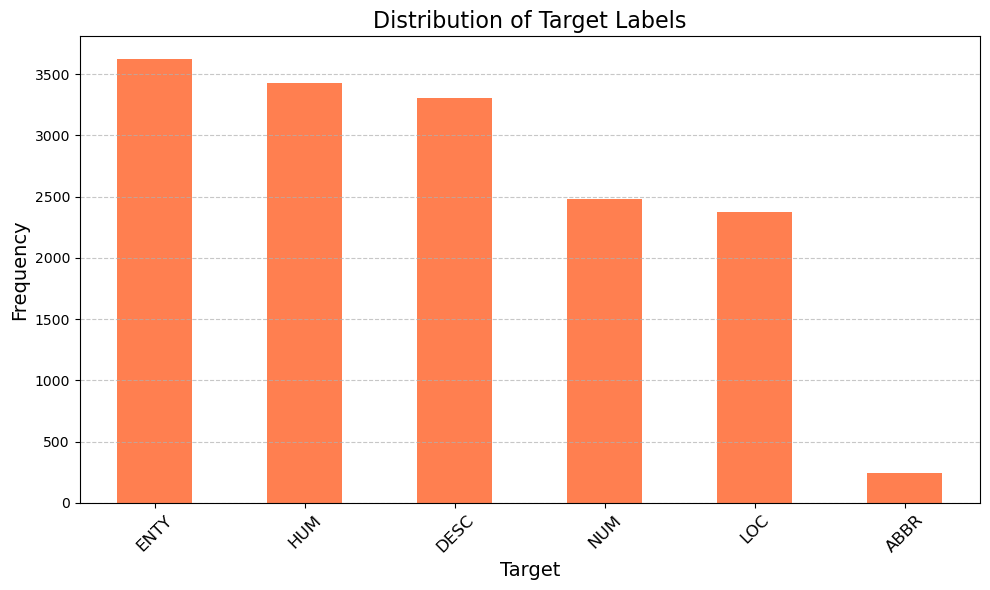

In [7]:
plt.figure(figsize=(10, 6))
train_data["target"].value_counts().plot(kind="bar", color='coral')
plt.title("Distribution of Target Labels", fontsize=16)
plt.xlabel("Target", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

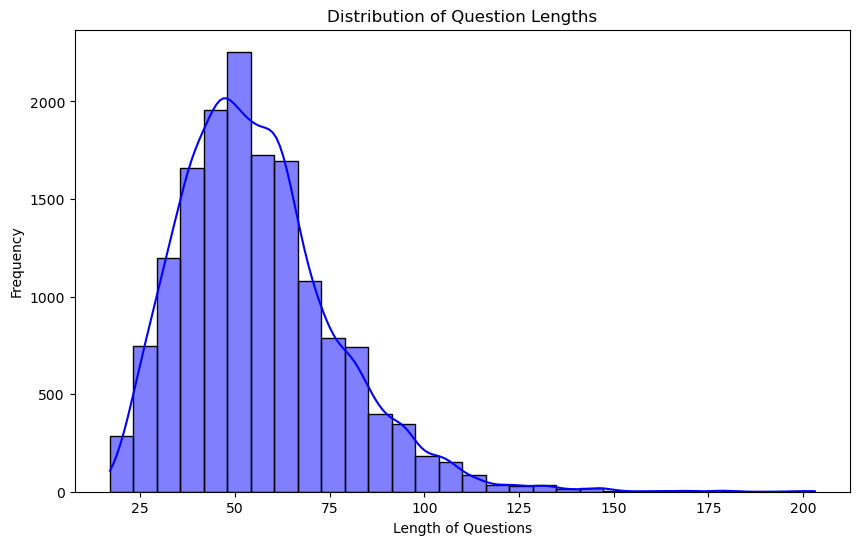

In [13]:
import seaborn as sns
# Visualization 2: Length of Questions
train_data['question_length'] = train_data['question'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['question_length'], bins=30, kde=True, color="blue")
plt.title("Distribution of Question Lengths")
plt.xlabel("Length of Questions")
plt.ylabel("Frequency")
plt.show()

In [17]:
pip install  wordcloud

Note: you may need to restart the kernel to use updated packages.


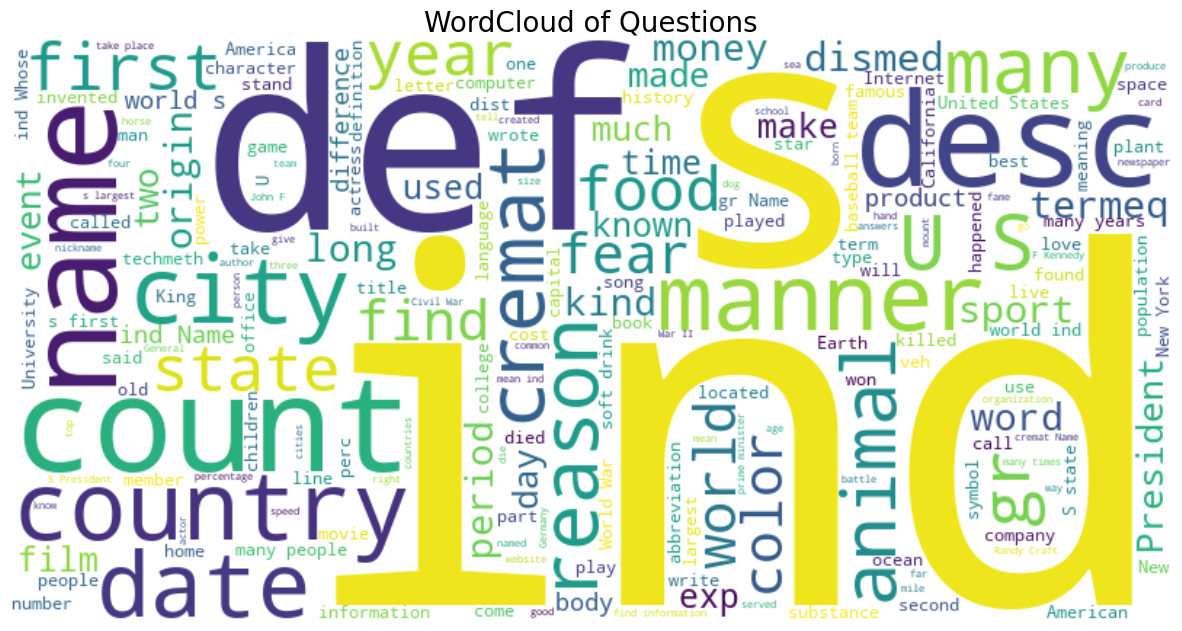

In [18]:
# Visualization 3: Top Words in Questions
from collections import Counter
from wordcloud import WordCloud
# Generate word frequency
all_words = " ".join(train_data['question'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Questions", fontsize=20)
plt.show()

In [22]:
train_data

,target,question,question_length
0,DESC,manner How did serfdom develop in and then lea...,57
1,ENTY,cremat What films featured the character Popey...,55
2,DESC,manner How can I find a list of celebrities ' ...,58
3,ENTY,animal What fowl grabs the spotlight after the...,75
4,ABBR,exp What is the full form of .com ?,35
...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45
15448,ENTY,currency What type of currency is used in China ?,49
15449,NUM,temp What is the temperature today ?,36
15450,NUM,temp What is the temperature for cooking ?,42


In [25]:
#data cleaning 
import re

# Define text-cleaning functions
def pre_process(raw_sentence):
    return re.sub(r"[^a-zA-Z0-9\s\'?!,.]", r"", raw_sentence)

def remove_extra_spaces(raw_sentence):
    return re.sub(r"\s\s+", r" ", raw_sentence)

def remove_space_before_apost(raw_sentence):
    return re.sub(r"\s'", r"'", raw_sentence)

def remove_endline_char(raw_sentence):
    return re.sub(r"\n", r"", raw_sentence)

def clean_sentence(sentence):
    sentence = pre_process(sentence)
    sentence = remove_extra_spaces(sentence)
    sentence = remove_space_before_apost(sentence)
    sentence = remove_endline_char(sentence)
    return sentence

# Apply the cleaning functions to the `question` column
train_data['cleaned_question'] = train_data['question'].apply(clean_sentence)

In [27]:
train_data[['question', 'cleaned_question']]

,question,cleaned_question
0,manner How did serfdom develop in and then lea...,manner How did serfdom develop in and then lea...
1,cremat What films featured the character Popey...,cremat What films featured the character Popey...
2,manner How can I find a list of celebrities ' ...,manner How can I find a list of celebrities' r...
3,animal What fowl grabs the spotlight after the...,animal What fowl grabs the spotlight after the...
4,exp What is the full form of .com ?,exp What is the full form of .com ?
...,...,...
15447,other What 's the shape of a camel 's spine ?,other What's the shape of a camel's spine ?
15448,currency What type of currency is used in China ?,currency What type of currency is used in China ?
15449,temp What is the temperature today ?,temp What is the temperature today ?
15450,temp What is the temperature for cooking ?,temp What is the temperature for cooking ?


In [28]:
train_data

,target,question,question_length,cleaned_question
0,DESC,manner How did serfdom develop in and then lea...,57,manner How did serfdom develop in and then lea...
1,ENTY,cremat What films featured the character Popey...,55,cremat What films featured the character Popey...
2,DESC,manner How can I find a list of celebrities ' ...,58,manner How can I find a list of celebrities' r...
3,ENTY,animal What fowl grabs the spotlight after the...,75,animal What fowl grabs the spotlight after the...
4,ABBR,exp What is the full form of .com ?,35,exp What is the full form of .com ?
...,...,...,...,...
15447,ENTY,other What 's the shape of a camel 's spine ?,45,other What's the shape of a camel's spine ?
15448,ENTY,currency What type of currency is used in China ?,49,currency What type of currency is used in China ?
15449,NUM,temp What is the temperature today ?,36,temp What is the temperature today ?
15450,NUM,temp What is the temperature for cooking ?,42,temp What is the temperature for cooking ?
